In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r'C:\Users\Sevas\Desktop\Estadistica Avanzada\datacountstudents.csv')
df.head()

id  yC      x1     x2  x3  x4  x5  x6  x7        x8    ...        x23  \
0   1   1  49.856  118.8   1   0   0   0   0  16.32096    ...     0.9709   
1   2   0  71.836   34.8   0   0   0   0   1  15.00535    ...     0.4200   
2   3   0  66.725   41.8   0   1   0   0   0  17.07023    ...     0.9650   
3   4   0  41.696  132.0   0   0   1   0   0  16.31460    ...     0.0091   
4   5   2  71.351   24.2   1   0   0   0   0  11.10790    ...     0.0051   

      x24  x25  x26       x27  x28  x29  x30       x31       x32  
0  0.0003    6    6   24.7138    0    0    7  0.056546  0.112860  
1  0.0000    8    4   38.0658    0    0    7  0.655260  0.886908  
2  0.0000    6    6   48.3807    0    1    4  0.067855  0.133944  
3  0.0001    6    4   59.8410    0    0    7  0.133230  0.260102  
4  0.0000    5    7  175.9250    0    0    3  0.318584  0.627729  

[5 rows x 34 columns]

In [3]:
pd.isnull(df).sum()

id     0
yC     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
dtype: int64

In [4]:
df['yC'].value_counts()

0    50
1    43
2    35
3    12
4     6
5     2
7     1
6     1
Name: yC, dtype: int64

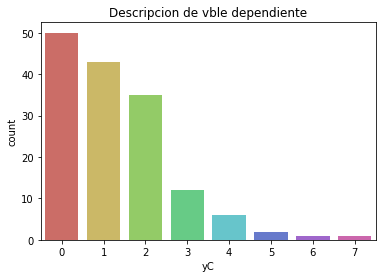

In [5]:
sns.countplot(x='yC',data=df,palette='hls')
plt.savefig('count_plot')
plt.title('Descripcion de vble dependiente')
plt.show()

In [6]:

df_cat=pd.DataFrame(df[['yC','x3','x4','x5','x6','x7','x13','x14','x15','x16','x17','x18','x19','x20','x28','x29']])
df_cat.head()

yC  x3  x4  x5  x6  x7  x13  x14  x15  x16  x17  x18  x19  x20  x28  x29
0   1   1   0   0   0   0    0    1    0    1    0    0    0    0    0    0
1   0   0   0   0   0   1    0    0    0    0    0    0    0    0    0    0
2   0   0   1   0   0   0    0    0    0    0    1    0    0    0    0    1
3   0   0   0   1   0   0    0    0    0    0    1    0    0    0    0    0
4   2   1   0   0   0   0    1    0    1    0    0    0    1    0    0    0

In [7]:
df_num=df.drop(labels=['id','yC','x3','x4','x5','x6','x7','x13','x14','x15','x16','x17','x18','x19','x20','x28','x29'],axis=1)
df_num.head()

x1     x2        x8  x9         x10       x11       x12     x21  \
0  49.856  118.8  16.32096   0   18.762237  6.162105   9.39728  0.0004   
1  71.836   34.8  15.00535  44  119.946790  7.381654  10.42370  0.2999   
2  66.725   41.8  17.07023  27   10.879595  7.854230  12.97680  0.0051   
3  41.696  132.0  16.31460   0    9.762927  7.545124  30.42790  0.9289   
4  71.351   24.2  11.10790  31  151.581820  9.207040   0.00000  0.8028   

      x22     x23     x24  x25  x26       x27  x30       x31       x32  
0  0.0000  0.9709  0.0003    6    6   24.7138    7  0.056546  0.112860  
1  0.0001  0.4200  0.0000    8    4   38.0658    7  0.655260  0.886908  
2  0.0000  0.9650  0.0000    6    6   48.3807    4  0.067855  0.133944  
3  0.0000  0.0091  0.0001    6    4   59.8410    7  0.133230  0.260102  
4  0.0000  0.0051  0.0000    5    7  175.9250    3  0.318584  0.627729

In [8]:
df_num.describe()

x1          x2          x8          x9          x10  \
count  150.000000  150.000000  150.000000  150.000000   150.000000   
mean    64.315059   50.366667   15.403789   27.593333   139.556769   
std     10.050340   41.298169    1.929863   15.434684   397.363194   
min     34.217000    4.600000   10.617270    0.000000     1.405897   
25%     56.866750   14.725000   14.507013   25.500000    17.241500   
50%     67.754500   40.000000   15.463720   31.000000    53.866725   
75%     71.519725   81.400000   16.586320   39.750000   123.527010   
max     78.836829  173.700000   20.850060   45.000000  4547.958200   

              x11         x12         x21         x22         x23         x24  \
count  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000   
mean     7.803776    7.774620    0.558024    0.006207    0.239536    0.032573   
std      1.505953   11.453525    0.378927    0.064490    0.350769    0.134419   
min      4.948077    0.000000    0.000400    0.000000    0.000000    0.000000   
25%      6.580687    0.260553    0.109500    0.000000    0.001625    0.000000   
50%      7.748950    2.714070    0.713800    0.000050    0.021850    0.000100   
75%      8.986054   10.344950    0.914425    0.000500    0.415925    0.001500   
max     10.806890   47.476500    0.989700    0.790100    0.994200    0.846600   

              x25         x26         x27         x30         x31         x32  
count  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000  
mean     6.380000    5.586667   78.493669    3.926667    0.283136    0.491055  
std      0.924462    0.963680   47.992359    2.186280    0.193801    0.299361  
min      4.000000    3.000000   11.087400    1.000000    0.011540    0.023037  
25%      6.000000    5.000000   44.936225    2.000000    0.100434    0.194432  
50%      6.000000    6.000000   66.404000    4.000000    0.247636    0.461095  
75%      7.000000    6.000000  102.720000    6.000000    0.436986    0.797946  
max      9.000000    7.000000  344.830000    7.000000    0.662330    0.996328

In [9]:
df_num=pd.concat([df['yC'],df_num],axis=1)

corr=df_num.corr()

corr.style.background_gradient(cmap='coolwarm')

In [75]:
from sklearn.model_selection import KFold


train,test=train_test_split(df,test_size=0.3)

kftr=KFold(n_splits=10,random_state=None,shuffle=False)
kfts=KFold(n_splits=10,random_state=None,shuffle=False)
kftr.get_n_splits(train)
kfts.get_n_splits(test)

len(train),len(test)

(105, 45)

## Estandarizacion de Variables Train

In [76]:
vble_cat=train[['yC','x3','x4','x5','x6','x7','x13','x14','x15','x16','x17','x18','x19','x20','x28','x29']]
len(vble_cat)

105

In [77]:
colm=vble_cat.columns.tolist()
vble_cat.head()

yC  x3  x4  x5  x6  x7  x13  x14  x15  x16  x17  x18  x19  x20  x28  x29
3     0   0   0   1   0   0    0    0    0    0    1    0    0    0    0    0
64    3   1   0   0   0   0    1    0    1    0    0    1    0    0    0    0
127   1   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0
119   1   0   0   1   0   0    0    0    0    1    0    0    0    0    0    0
86    3   0   0   0   0   0    0    0    0    1    0    0    0    0    0    0

In [78]:
train_num=train.drop(labels=['id','yC','x3','x4','x5','x6','x7','x13','x14','x15','x16','x17','x18','x19','x20','x28','x29'],axis=1)
train_num.head()

x1     x2        x8  x9         x10       x11        x12     x21  \
3    41.696000  132.0  16.31460   0    9.762927  7.545124  30.427900  0.9289   
64   68.600000   18.1  11.47505  30  283.185290  8.311214   0.000000  0.8270   
127  73.965854   11.5  16.11642  45  109.106210  9.573521   0.579518  0.9440   
119  67.181000   31.8  14.41003  37    5.855121  9.257285  42.230000  0.0467   
86   71.597561   13.3  17.57367  38  444.425490  9.045114   0.059888  0.2341   

        x22     x23     x24  x25  x26       x27  x30       x31       x32  
3    0.0000  0.0091  0.0001    6    4   59.8410    7  0.133230  0.260102  
64   0.0000  0.0000  0.0000    5    7  105.2140    2  0.286142  0.572284  
127  0.0001  0.0020  0.0051    6    6   66.3074    1  0.106453  0.208795  
119  0.0000  0.8553  0.0065    6    6   74.8292    6  0.257866  0.462323  
86   0.0000  0.0001  0.2165    6    6   56.9830    2  0.596594  0.858751

In [79]:
colmane=train_num.columns.values.tolist()
zscore_df = stats.zscore(train_num, axis=1)

train_esta=pd.DataFrame(zscore_df,columns=colmane)
len(train_esta)

105

In [80]:
train_esta=train_num.iloc[list(train_esta.index)]
train_esta.head()

x1     x2        x8  x9         x10       x11        x12     x21  \
3    41.696000  132.0  16.31460   0    9.762927  7.545124  30.427900  0.9289   
64   68.600000   18.1  11.47505  30  283.185290  8.311214   0.000000  0.8270   
127  73.965854   11.5  16.11642  45  109.106210  9.573521   0.579518  0.9440   
119  67.181000   31.8  14.41003  37    5.855121  9.257285  42.230000  0.0467   
86   71.597561   13.3  17.57367  38  444.425490  9.045114   0.059888  0.2341   

        x22     x23     x24  x25  x26       x27  x30       x31       x32  
3    0.0000  0.0091  0.0001    6    4   59.8410    7  0.133230  0.260102  
64   0.0000  0.0000  0.0000    5    7  105.2140    2  0.286142  0.572284  
127  0.0001  0.0020  0.0051    6    6   66.3074    1  0.106453  0.208795  
119  0.0000  0.8553  0.0065    6    6   74.8292    6  0.257866  0.462323  
86   0.0000  0.0001  0.2165    6    6   56.9830    2  0.596594  0.858751

## Estandarizacion de Variables Test

In [81]:
test_num=test.drop(labels=['id','yC','x3','x4','x5','x6','x7','x13','x14','x15','x16','x17','x18','x19','x20','x28','x29'],axis=1)
test_num.head()

x1    x2        x8  x9          x10       x11       x12     x21  \
2    66.725000  41.8  17.07023  27    10.879595  7.854230  12.97680  0.0051   
103  75.935683  10.0  12.77753  31  1106.781300  9.177732   0.00000  0.9891   
146  71.108000  18.6  11.83635  31   226.532790  8.497351   0.00000  0.9854   
140  56.638000  31.2  12.65025  31    11.141122  6.893602   6.97441  0.9500   
100  70.727000  14.3  16.70801  23    54.902818  8.054242  17.06650  0.0800   

        x22     x23     x24  x25  x26       x27  x30       x31       x32  
2    0.0000  0.9650  0.0000    6    6   48.3807    4  0.067855  0.133944  
103  0.0001  0.0035  0.0000    7    6  164.4840    1  0.021616  0.042915  
146  0.0000  0.0000  0.0000    5    7  156.7250    1  0.028774  0.057547  
140  0.0000  0.0014  0.0033    5    6   94.7451    1  0.095435  0.188388  
100  0.0000  0.5860  0.1820    7    6  146.9640    5  0.593976  0.778966

In [82]:
colmanet=test_num.columns.values.tolist()
zscore_dft = stats.zscore(test_num, axis=1)

test_esta=pd.DataFrame(zscore_dft,columns=colmane)
len(test_esta)

45

In [83]:
test_esta=test_num.iloc[list(test_esta.index)]
test_esta.head()

x1    x2        x8  x9          x10       x11       x12     x21  \
2    66.725000  41.8  17.07023  27    10.879595  7.854230  12.97680  0.0051   
103  75.935683  10.0  12.77753  31  1106.781300  9.177732   0.00000  0.9891   
146  71.108000  18.6  11.83635  31   226.532790  8.497351   0.00000  0.9854   
140  56.638000  31.2  12.65025  31    11.141122  6.893602   6.97441  0.9500   
100  70.727000  14.3  16.70801  23    54.902818  8.054242  17.06650  0.0800   

        x22     x23     x24  x25  x26       x27  x30       x31       x32  
2    0.0000  0.9650  0.0000    6    6   48.3807    4  0.067855  0.133944  
103  0.0001  0.0035  0.0000    7    6  164.4840    1  0.021616  0.042915  
146  0.0000  0.0000  0.0000    5    7  156.7250    1  0.028774  0.057547  
140  0.0000  0.0014  0.0033    5    6   94.7451    1  0.095435  0.188388  
100  0.0000  0.5860  0.1820    7    6  146.9640    5  0.593976  0.778966

In [84]:
test_glo=pd.concat([test[colm],test_esta],axis=1)
test_glo.head()

yC  x3  x4  x5  x6  x7  x13  x14  x15  x16    ...        x21     x22  \
2     0   0   1   0   0   0    0    0    0    0    ...     0.0051  0.0000   
103   1   1   0   0   0   0    1    0    0    0    ...     0.9891  0.0001   
146   4   1   0   0   0   0    1    0    0    0    ...     0.9854  0.0000   
140   2   1   0   0   0   0    1    0    0    0    ...     0.9500  0.0000   
100   0   1   0   0   0   0    0    0    1    1    ...     0.0800  0.0000   

        x23     x24  x25  x26       x27  x30       x31       x32  
2    0.9650  0.0000    6    6   48.3807    4  0.067855  0.133944  
103  0.0035  0.0000    7    6  164.4840    1  0.021616  0.042915  
146  0.0000  0.0000    5    7  156.7250    1  0.028774  0.057547  
140  0.0014  0.0033    5    6   94.7451    1  0.095435  0.188388  
100  0.5860  0.1820    7    6  146.9640    5  0.593976  0.778966  

[5 rows x 33 columns]

In [85]:
#df_es=pd.concat(train_esta)

corr=train_esta.corr()

corr.style.background_gradient(cmap='coolwarm')

In [86]:
train_glo=pd.concat([train[colm],train_esta],axis=1)
train_glo.head()

yC  x3  x4  x5  x6  x7  x13  x14  x15  x16    ...        x21     x22  \
3     0   0   0   1   0   0    0    0    0    0    ...     0.9289  0.0000   
64    3   1   0   0   0   0    1    0    1    0    ...     0.8270  0.0000   
127   1   0   0   0   0   0    0    0    0    0    ...     0.9440  0.0001   
119   1   0   0   1   0   0    0    0    0    1    ...     0.0467  0.0000   
86    3   0   0   0   0   0    0    0    0    1    ...     0.2341  0.0000   

        x23     x24  x25  x26       x27  x30       x31       x32  
3    0.0091  0.0001    6    4   59.8410    7  0.133230  0.260102  
64   0.0000  0.0000    5    7  105.2140    2  0.286142  0.572284  
127  0.0020  0.0051    6    6   66.3074    1  0.106453  0.208795  
119  0.8553  0.0065    6    6   74.8292    6  0.257866  0.462323  
86   0.0001  0.2165    6    6   56.9830    2  0.596594  0.858751  

[5 rows x 33 columns]

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, classification_report,f1_score,recall_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

In [88]:
coln=train_glo.columns.values.tolist()
target=coln[0]
predictor=coln[1:len(coln)]
len(target),len(predictor)

(2, 32)

## Metodo ElastictNet

In [99]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, classification_report,f1_score,recall_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.linear_model import ElasticNet

x=train_glo[predictor]
y=train_glo[target]

for i in np.arange(0,1,0.0001):
    lm_elas=ElasticNet(alpha=i, copy_X=True, fit_intercept=False, l1_ratio=0.75,
    max_iter=1000, normalize=False, positive=False, precompute=False,
    random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
    lm_elas.fit(x,y)
    predit=np.round(lm_elas.predict(test_glo[predictor]))
    r=pd.Series(lm_elas.coef_,index=test_glo[predictor].columns)
    r=r[r!=0]
    #cv=KFold(n_splits=10,shuffle=True,random_state=1)
    #pre=np.round(cross_val_predict(lm_elas,x,y,cv=10))
    w=np.array([0 if e==0 else 1 for e in predit])
    rs=np.array([0 if e==0 else 1 for e in test_glo[target]])
    accuracy=accuracy_score(rs,w)
    print('accuracy',accuracy)
    print('Las variables seleccionadas son:',len(r))
   # print('Rsquare elastic net i es=',i,'Rquere=',np.round(lm_elas.score(x,y)*100,2),'%')
    print('MSE=',metrics.mean_squared_error(test_glo[target],predit))
    print(' elastic net i es=',i)
    print('-------------------------------------------')

C:\Users\Sevas\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\

accuracy 0.7777777777777778
Las variables seleccionadas son: 32
MSE= 16.866666666666667
 elastic net i es= 0.0
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 32
MSE= 3.2444444444444445
 elastic net i es= 0.0001
-------------------------------------------
accuracy 0.8
Las variables seleccionadas son: 32
MSE= 2.6
 elastic net i es= 0.0002
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 30
MSE= 2.6666666666666665
 elastic net i es= 0.00030000000000000003
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 30
MSE= 2.6666666666666665
 elastic net i es= 0.0004
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 30
MSE= 2.6666666666666665
 elastic net i es= 0.0005
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 30
MSE= 

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

MSE= 2.3777777777777778
 elastic net i es= 0.0024000000000000002
-------------------------------------------
accuracy 0.8
Las variables seleccionadas son: 30
MSE= 2.3777777777777778
 elastic net i es= 0.0025
-------------------------------------------
accuracy 0.8
Las variables seleccionadas son: 30
MSE= 2.3777777777777778
 elastic net i es= 0.0026000000000000003
-------------------------------------------
accuracy 0.8
Las variables seleccionadas son: 30
MSE= 2.3555555555555556
 elastic net i es= 0.0027
-------------------------------------------
accuracy 0.8
Las variables seleccionadas son: 29
MSE= 2.3555555555555556
 elastic net i es= 0.0028
-------------------------------------------
accuracy 0.8
Las variables seleccionadas son: 30
MSE= 2.3555555555555556
 elastic net i es= 0.0029000000000000002
-------------------------------------------
accuracy 0.8
Las variables seleccionadas son: 30
MSE= 2.3555555555555556
 elastic net i es= 0.003
-------------------------------------------
accu

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa


accuracy 0.7777777777777778
Las variables seleccionadas son: 28
MSE= 2.3333333333333335
 elastic net i es= 0.0045000000000000005
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 28
MSE= 2.3333333333333335
 elastic net i es= 0.0046
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 28
MSE= 2.3333333333333335
 elastic net i es= 0.0047
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 28
MSE= 2.3333333333333335
 elastic net i es= 0.0048000000000000004
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 28
MSE= 2.311111111111111
 elastic net i es= 0.0049
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 28
MSE= 2.311111111111111
 elastic net i es= 0.005
-------------------------------------------
accuracy 0.7777777777777

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

 0.7777777777777778
Las variables seleccionadas son: 27
MSE= 1.8888888888888888
 elastic net i es= 0.0071
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 27
MSE= 1.8888888888888888
 elastic net i es= 0.007200000000000001
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 27
MSE= 1.8888888888888888
 elastic net i es= 0.0073
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 27
MSE= 1.8888888888888888
 elastic net i es= 0.0074
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 27
MSE= 1.8888888888888888
 elastic net i es= 0.007500000000000001
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 27
MSE= 1.8888888888888888
 elastic net i es= 0.0076
-------------------------------------------
accuracy 0.7777777777777778
Las 

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

24
MSE= 1.9111111111111112
 elastic net i es= 0.0099
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 24
MSE= 1.9111111111111112
 elastic net i es= 0.01
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 24
MSE= 1.9111111111111112
 elastic net i es= 0.010100000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 24
MSE= 1.9111111111111112
 elastic net i es= 0.0102
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 24
MSE= 1.9111111111111112
 elastic net i es= 0.0103
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 24
MSE= 1.9111111111111112
 elastic net i es= 0.010400000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 24
MSE= 1.9111111111111112

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa


MSE= 1.9555555555555555
 elastic net i es= 0.0128
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 24
MSE= 1.9555555555555555
 elastic net i es= 0.0129
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 24
MSE= 1.9555555555555555
 elastic net i es= 0.013000000000000001
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 24
MSE= 1.9555555555555555
 elastic net i es= 0.0131
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 23
MSE= 1.9555555555555555
 elastic net i es= 0.0132
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 23
MSE= 1.9555555555555555
 elastic net i es= 0.013300000000000001
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 23
MSE= 1.9555555555555555

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

 0.7777777777777778
Las variables seleccionadas son: 23
MSE= 1.9555555555555555
 elastic net i es= 0.0143
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 23
MSE= 1.9555555555555555
 elastic net i es= 0.014400000000000001
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 23
MSE= 1.9555555555555555
 elastic net i es= 0.0145
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 23
MSE= 1.9555555555555555
 elastic net i es= 0.0146
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 23
MSE= 1.9555555555555555
 elastic net i es= 0.014700000000000001
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 23
MSE= 1.9555555555555555
 elastic net i es= 0.0148
-------------------------------------------
accuracy 0.7777777777777778
Las 

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7777777777777778
Las variables seleccionadas son: 23
MSE= 1.9555555555555555
 elastic net i es= 0.015700000000000002
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 23
MSE= 1.9555555555555555
 elastic net i es= 0.0158
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 23
MSE= 1.9555555555555555
 elastic net i es= 0.0159
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 23
MSE= 1.9555555555555555
 elastic net i es= 0.016
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 23
MSE= 1.9555555555555555
 elastic net i es= 0.0161
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 23
MSE= 1.9555555555555555
 elastic net i es= 0.0162
-------------------------------------------
accuracy 0.7777777777777778
Las variabl

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.8444444444444446
 elastic net i es= 0.0172
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.8444444444444446
 elastic net i es= 0.0173
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.8444444444444446
 elastic net i es= 0.017400000000000002
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.8444444444444446
 elastic net i es= 0.0175
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.8444444444444446
 elastic net i es= 0.0176
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.8444444444444446
 elastic net i es= 0.0177
-------------------------------------------
accuracy 0.7777777777777778
Las variab

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.8666666666666667
 elastic net i es= 0.0187
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.8666666666666667
 elastic net i es= 0.0188
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.8666666666666667
 elastic net i es= 0.0189
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.8666666666666667
 elastic net i es= 0.019
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.8666666666666667
 elastic net i es= 0.019100000000000002
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.8666666666666667
 elastic net i es= 0.019200000000000002
-------------------------------------------
accuracy 0.75555555555555

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.8666666666666667
 elastic net i es= 0.020200000000000003
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.8666666666666667
 elastic net i es= 0.020300000000000002
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.8666666666666667
 elastic net i es= 0.0204
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.8666666666666667
 elastic net i es= 0.0205
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.8666666666666667
 elastic net i es= 0.0206
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.8666666666666667
 elastic net i es= 0.0207
-------------------------------------------
accuracy 0.7555555555555

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.8666666666666667
 elastic net i es= 0.0217
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.8666666666666667
 elastic net i es= 0.0218
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.0219
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.022000000000000002
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.0221
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.0222
-------------------------------------------
accuracy 0.7777777777777778
Las variab

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.023100000000000002
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.023200000000000002
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.0233
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.0234
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.0235
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.0236
-------------------------------------------
accuracy 0.7777777777777

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.024800000000000003
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.024900000000000002
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.025
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.0251
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.0252
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.0253
-------------------------------------------
accuracy 0.77777777777777

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.0264
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.026500000000000003
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.026600000000000002
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6666666666666667
 elastic net i es= 0.0267
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6
 elastic net i es= 0.0268
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.6
 elastic net i es= 0.0269
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionada

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

Las variables seleccionadas son: 22
MSE= 1.5333333333333334
 elastic net i es= 0.0279
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.5333333333333334
 elastic net i es= 0.028
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.4666666666666666
 elastic net i es= 0.0281
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.4666666666666666
 elastic net i es= 0.028200000000000003
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.4666666666666666
 elastic net i es= 0.028300000000000002
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.4666666666666666
 elastic net i es= 0.0284
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionad

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.4666666666666666
 elastic net i es= 0.0308
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.4666666666666666
 elastic net i es= 0.0309
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.4444444444444444
 elastic net i es= 0.031
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.4444444444444444
 elastic net i es= 0.031100000000000003
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.488888888888889
 elastic net i es= 0.031200000000000002
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 22
MSE= 1.488888888888889
 elastic net i es= 0.0313
-------------------------------------------
accuracy 0.7555555555555555

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.5777777777777777
 elastic net i es= 0.0323
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.5777777777777777
 elastic net i es= 0.0324
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.5777777777777777
 elastic net i es= 0.0325
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.5777777777777777
 elastic net i es= 0.032600000000000004
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.5777777777777777
 elastic net i es= 0.0327
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.5777777777777777
 elastic net i es= 0.0328
-------------------------------------------
accuracy 0.7555555555555555
Las variab

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.5777777777777777
 elastic net i es= 0.0339
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.6444444444444444
 elastic net i es= 0.034
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.6444444444444444
 elastic net i es= 0.0341
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 22
MSE= 1.6444444444444444
 elastic net i es= 0.0342
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.6444444444444444
 elastic net i es= 0.034300000000000004
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.6444444444444444
 elastic net i es= 0.0344
-------------------------------------------
accuracy 0.7555555555555555
Las variabl

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.6666666666666667
 elastic net i es= 0.035500000000000004
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.6666666666666667
 elastic net i es= 0.0356
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.6666666666666667
 elastic net i es= 0.0357
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.6666666666666667
 elastic net i es= 0.0358
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.6666666666666667
 elastic net i es= 0.0359
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.6666666666666667
 elastic net i es= 0.036000000000000004
-------------------------------------------
accuracy 0.7555555555555

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.6666666666666667
 elastic net i es= 0.037000000000000005
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.6666666666666667
 elastic net i es= 0.0371
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.6666666666666667
 elastic net i es= 0.037200000000000004
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.6666666666666667
 elastic net i es= 0.0373
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.6
 elastic net i es= 0.0374
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.6
 elastic net i es= 0.0375
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionada

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.5777777777777777
 elastic net i es= 0.0385
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.5777777777777777
 elastic net i es= 0.0386
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.5777777777777777
 elastic net i es= 0.038700000000000005
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.5777777777777777
 elastic net i es= 0.0388
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.5777777777777777
 elastic net i es= 0.038900000000000004
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 21
MSE= 1.5777777777777777
 elastic net i es= 0.039
-------------------------------------------
accuracy 0.75555555555555

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 20
MSE= 1.5777777777777777
 elastic net i es= 0.04
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 20
MSE= 1.5777777777777777
 elastic net i es= 0.040100000000000004
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 20
MSE= 1.5777777777777777
 elastic net i es= 0.0402
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 20
MSE= 1.5777777777777777
 elastic net i es= 0.0403
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 20
MSE= 1.5777777777777777
 elastic net i es= 0.040400000000000005
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 20
MSE= 1.5777777777777777
 elastic net i es= 0.0405
-------------------------------------------
accuracy 0.755555555555555

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 19
MSE= 1.5777777777777777
 elastic net i es= 0.041600000000000005
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 19
MSE= 1.6444444444444444
 elastic net i es= 0.0417
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 19
MSE= 1.6444444444444444
 elastic net i es= 0.041800000000000004
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 19
MSE= 1.6444444444444444
 elastic net i es= 0.0419
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 19
MSE= 1.6444444444444444
 elastic net i es= 0.042
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 19
MSE= 1.6444444444444444
 elastic net i es= 0.042100000000000005
-------------------------------------------
accuracy 0.

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 19
MSE= 1.6222222222222222
 elastic net i es= 0.0432
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 19
MSE= 1.5555555555555556
 elastic net i es= 0.043300000000000005
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 19
MSE= 1.5555555555555556
 elastic net i es= 0.0434
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 19
MSE= 1.5555555555555556
 elastic net i es= 0.043500000000000004
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 19
MSE= 1.5555555555555556
 elastic net i es= 0.0436
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 19
MSE= 1.5555555555555556
 elastic net i es= 0.0437
-------------------------------------------
accuracy 0.7555555555555

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 18
MSE= 1.5555555555555556
 elastic net i es= 0.0446
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 18
MSE= 1.5555555555555556
 elastic net i es= 0.044700000000000004
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 18
MSE= 1.5555555555555556
 elastic net i es= 0.0448
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 18
MSE= 1.5555555555555556
 elastic net i es= 0.0449
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 18
MSE= 1.5555555555555556
 elastic net i es= 0.045000000000000005
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 18
MSE= 1.5777777777777777
 elastic net i es= 0.0451
-------------------------------------------
accuracy 0.7555555555555

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.5555555555555556
 elastic net i es= 0.0461
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.5555555555555556
 elastic net i es= 0.046200000000000005
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.5555555555555556
 elastic net i es= 0.0463
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.5555555555555556
 elastic net i es= 0.046400000000000004
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.4444444444444444
 elastic net i es= 0.0465
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.4444444444444444
 elastic net i es= 0.0466
-------------------------------------------
accuracy 0.7777777777777

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.4444444444444444
 elastic net i es= 0.049100000000000005
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.4444444444444444
 elastic net i es= 0.0492
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.4444444444444444
 elastic net i es= 0.049300000000000004
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.3777777777777778
 elastic net i es= 0.0494
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.3777777777777778
 elastic net i es= 0.0495
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.3777777777777778
 elastic net i es= 0.049600000000000005
-------------------------------------------
accuracy 0

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.3555555555555556
 elastic net i es= 0.0507
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.3555555555555556
 elastic net i es= 0.050800000000000005
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.3555555555555556
 elastic net i es= 0.0509
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.3555555555555556
 elastic net i es= 0.051000000000000004
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.3555555555555556
 elastic net i es= 0.0511
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.3555555555555556
 elastic net i es= 0.0512
-------------------------------------------
accuracy 0.7777777777777

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.2
 elastic net i es= 0.0522
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.2
 elastic net i es= 0.0523
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 18
MSE= 1.2
 elastic net i es= 0.0524
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 17
MSE= 1.2
 elastic net i es= 0.052500000000000005
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 17
MSE= 1.2
 elastic net i es= 0.0526
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 17
MSE= 1.2
 elastic net i es= 0.052700000000000004
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 17
MSE= 1.2
 elastic net i es= 0.0528
---------------

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.053700000000000005
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.0538
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.0539
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.054
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.0541
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.054200000000000005
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.0543
----------------

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.0553
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.055400000000000005
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.0555
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.055600000000000004
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.0557
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.0558
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.055900000000000005
-

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.056900000000000006
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.057
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.057100000000000005
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.0572
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.057300000000000004
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.0574
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.0575
--

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.0585
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.058600000000000006
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.2
 elastic net i es= 0.0587
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.1777777777777778
 elastic net i es= 0.058800000000000005
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.1777777777777778
 elastic net i es= 0.0589
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.1777777777777778
 elastic net i es= 0.059000000000000004
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.1777777777777778
 elastic net i es= 0.060000000000000005
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.1777777777777778
 elastic net i es= 0.0601
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.1777777777777778
 elastic net i es= 0.060200000000000004
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.1777777777777778
 elastic net i es= 0.0603
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.1777777777777778
 elastic net i es= 0.0604
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 16
MSE= 1.1777777777777778
 elastic net i es= 0.060500000000000005
-------------------------------------------
accuracy 0

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7777777777777778
Las variables seleccionadas son: 15
MSE= 1.1777777777777778
 elastic net i es= 0.061500000000000006
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 15
MSE= 1.1777777777777778
 elastic net i es= 0.0616
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 15
MSE= 1.1777777777777778
 elastic net i es= 0.061700000000000005
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 15
MSE= 1.1777777777777778
 elastic net i es= 0.0618
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 15
MSE= 1.1777777777777778
 elastic net i es= 0.061900000000000004
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 15
MSE= 1.1777777777777778
 elastic net i es= 0.062
-------------------------------------------
accuracy 0.

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

0.063
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 13
MSE= 1.1111111111111112
 elastic net i es= 0.0631
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 13
MSE= 1.1111111111111112
 elastic net i es= 0.0632
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 13
MSE= 1.1111111111111112
 elastic net i es= 0.06330000000000001
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 13
MSE= 1.1111111111111112
 elastic net i es= 0.0634
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 13
MSE= 1.1111111111111112
 elastic net i es= 0.0635
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 13
MSE= 1.1111111111111112
 elastic net i es= 0.0636
---------------------------------

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7777777777777778
Las variables seleccionadas son: 12
MSE= 1.1111111111111112
 elastic net i es= 0.06470000000000001
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 12
MSE= 1.1111111111111112
 elastic net i es= 0.0648
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 12
MSE= 1.1111111111111112
 elastic net i es= 0.0649
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 12
MSE= 1.1111111111111112
 elastic net i es= 0.065
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 12
MSE= 1.1111111111111112
 elastic net i es= 0.0651
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 12
MSE= 1.1111111111111112
 elastic net i es= 0.06520000000000001
-------------------------------------------
accuracy 0.7777777777777778

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

0.0663
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 12
MSE= 1.1333333333333333
 elastic net i es= 0.0664
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 12
MSE= 1.1333333333333333
 elastic net i es= 0.0665
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 12
MSE= 1.1333333333333333
 elastic net i es= 0.0666
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 12
MSE= 1.1333333333333333
 elastic net i es= 0.06670000000000001
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 12
MSE= 1.1333333333333333
 elastic net i es= 0.0668
-------------------------------------------
accuracy 0.7777777777777778
Las variables seleccionadas son: 12
MSE= 1.1333333333333333
 elastic net i es= 0.0669
--------------------------------

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


accuracy 0.7555555555555555
Las variables seleccionadas son: 11
MSE= 1.1555555555555554
 elastic net i es= 0.068
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 11
MSE= 1.1555555555555554
 elastic net i es= 0.06810000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 11
MSE= 1.1555555555555554
 elastic net i es= 0.0682
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 11
MSE= 1.1555555555555554
 elastic net i es= 0.0683
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 11
MSE= 1.1555555555555554
 elastic net i es= 0.0684
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 11
MSE= 1.1555555555555554
 elastic net i es= 0.0685
-------------------------------------------
accuracy 0.7555555555555555
Las variable

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0727
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0728
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0729
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.07300000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0731
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0732
-------------------------------------------
accuracy 0.7555555555555555
Las variabl

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

 0.0742
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0743
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.07440000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0745
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0746
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0747
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0748
-------------------------------

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0758
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.07590000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.076
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0761
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0762
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0763
-------------------------------------------
accuracy 0.7555555555555555
Las variable

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.07730000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.07740000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0775
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0776
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0777
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.07780000000000001
-------------------------------------------
accuracy 0.75

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0789
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.079
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0791
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0792
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.07930000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0794
-------------------------------------------
accuracy 0.7555555555555555
Las variable

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0805
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0806
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.08070000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.08080000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0809
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.081
-------------------------------------------
accuracy 0.7555555555555555

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.082
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0821
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.08220000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0823
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0824
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0825
-------------------------------------------
accuracy 0.7555555555555555
Las variable

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.08360000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.08370000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0838
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0839
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.084
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.08410000000000001
-------------------------------------------
accuracy 0.755

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.08510000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0852
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0853
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0854
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0855
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.08560000000000001
-------------------------------------------
accuracy 0.755555555555555

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0867
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0868
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0869
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.08700000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.08710000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0872
-------------------------------------------
accuracy 0.755555555555555

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0883
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0884
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.08850000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0886
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0887
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0888
-------------------------------------------
accuracy 0.7555555555555555
Las variabl

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0898
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.08990000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.09000000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0901
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0902
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0903
-------------------------------------------
accuracy 0.755555555555555

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0913
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.09140000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0915
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0916
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0917
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1333333333333333
 elastic net i es= 0.0918
-------------------------------------------
accuracy 0.7555555555555555
Las variabl

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.09290000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.093
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.0931
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.0932
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.09330000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.09340000000000001
-------------------------------------------
accuracy 0.755

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.0944
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.0945
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.0946
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.0947
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.09480000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.0949
-------------------------------------------
accuracy 0.7555555555555555
Las variabl

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.09620000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.09630000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.0964
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.0965
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.0966
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.09670000000000001
-------------------------------------------
accuracy 0.75

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.0978
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.0979
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.098
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.0981
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.09820000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.0983
-------------------------------------------
accuracy 0.7555555555555555
Las variable

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.0993
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.0994
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.0995
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.09960000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.09970000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.0998
-------------------------------------------
accuracy 0.755555555555555

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1009
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.101
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.10110000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1012
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1013
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1014
-------------------------------------------
accuracy 0.7555555555555555
Las variable

C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1024
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.10250000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.10260000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1027
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1028
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1029
-------------------------------------------
accuracy 0.755555555555555

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.10880000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.10890000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.109
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1091
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1092
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.10930000000000001
-------------------------------------------
accuracy 0.755

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.114
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.11410000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.11420000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1143
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1144
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1145
-------------------------------------------
accuracy 0.7555555555555555

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.11910000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1192
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1193
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1194
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.11950000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.11960000000000001
-------------------------------------------
accuracy 0.75

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.12560000000000002
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1257
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1258
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1259
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.126
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.12610000000000002
-------------------------------------------
accuracy 0.7555555555555555

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.1307
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.1308
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.13090000000000002
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.131
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.1311
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.1312
-------------------------------------------
accuracy 0.7555555555555555
Las variable

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.1373
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.1374
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.1375
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.1376
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.13770000000000002
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.1378
-------------------------------------------
accuracy 0.7555555555555555
Las variabl

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.14400000000000002
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1441
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1442
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1443
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1444
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.14450000000000002
-------------------------------------------
accuracy 0.755555555555555

-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1491
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1492
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.14930000000000002
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1494
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1495
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1555555555555554
 elastic net i es= 0.1496
---------------------------------------

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.1557
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.1558
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.1559
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.156
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.15610000000000002
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.1562
-------------------------------------------
accuracy 0.7555555555555555
Las variable

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.16090000000000002
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.161
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.16110000000000002
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.1612
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.1613
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.16140000000000002
-------------------------------------------
accuracy 0.755

accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.16620000000000001
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.1663
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.16640000000000002
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.1665
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.1666
-------------------------------------------
accuracy 0.7555555555555555
Las variables seleccionadas son: 10
MSE= 1.1777777777777778
 elastic net i es= 0.16670000000000001
-------------------------------------------
accuracy 0.75

accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1729
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.17300000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1731
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.17320000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1733
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1734
-------------------------------------------
accuracy 0.733333333333333

-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.17800000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1781
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1782
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.17830000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1784
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.17850000000000002
-------------

accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.18330000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1834
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1835
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1836
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1837
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.18380000000000002
-------------------------------------------
accuracy 0.733333333333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1885
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.18860000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1887
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1888
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1889
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.189
-------------------------------------------
accuracy 0.7333333333333333
Las variable

accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1937
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1938
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.19390000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.194
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.19410000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1942
-------------------------------------------
accuracy 0.7333333333333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1993
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.19940000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1995
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1996
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.19970000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 10
MSE= 1.2666666666666666
 elastic net i es= 0.1998
-------------------------------------------
accuracy 0.733333333333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3333333333333333
 elastic net i es= 0.20550000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3333333333333333
 elastic net i es= 0.2056
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3333333333333333
 elastic net i es= 0.20570000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3333333333333333
 elastic net i es= 0.2058
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3333333333333333
 elastic net i es= 0.2059
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3333333333333333
 elastic net i es= 0.20600000000000002
-------------------------------------------
accuracy 0.73333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3333333333333333
 elastic net i es= 0.2119
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3333333333333333
 elastic net i es= 0.21200000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3333333333333333
 elastic net i es= 0.2121
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3333333333333333
 elastic net i es= 0.2122
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3333333333333333
 elastic net i es= 0.21230000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3333333333333333
 elastic net i es= 0.2124
-------------------------------------------
accuracy 0.7333333333333333
Las 

accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3333333333333333
 elastic net i es= 0.2182
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3333333333333333
 elastic net i es= 0.21830000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3333333333333333
 elastic net i es= 0.2184
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3333333333333333
 elastic net i es= 0.2185
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3333333333333333
 elastic net i es= 0.21860000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3333333333333333
 elastic net i es= 0.2187
-------------------------------------------
accuracy 0.7333333333333333
Las 

Las variables seleccionadas son: 9
MSE= 1.3111111111111111
 elastic net i es= 0.2245
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3111111111111111
 elastic net i es= 0.22460000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3111111111111111
 elastic net i es= 0.2247
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3111111111111111
 elastic net i es= 0.2248
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3111111111111111
 elastic net i es= 0.22490000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3111111111111111
 elastic net i es= 0.225
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 

accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2306
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.23070000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2308
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.23090000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.231
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2311
-------------------------------------------
accuracy 0.7333333333333333
Las variabl

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.23670000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.2368
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.2369
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.23700000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.2371
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.23720000000000002
-------------------------------------------
accuracy 0.73333333333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.3555555555555556
 elastic net i es= 0.24280000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.3555555555555556
 elastic net i es= 0.2429
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.3555555555555556
 elastic net i es= 0.24300000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.3555555555555556
 elastic net i es= 0.2431
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.3555555555555556
 elastic net i es= 0.2432
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.3555555555555556
 elastic net i es= 0.24330000000000002
-------------------------------------------
accuracy 0.73333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.3555555555555556
 elastic net i es= 0.24880000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.3555555555555556
 elastic net i es= 0.2489
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.3555555555555556
 elastic net i es= 0.249
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.3555555555555556
 elastic net i es= 0.24910000000000002
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.3555555555555556
 elastic net i es= 0.2492
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.3555555555555556
 elastic net i es= 0.24930000000000002
-------------------------------------------
accuracy 0.733333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.3555555555555556
 elastic net i es= 0.25470000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.3555555555555556
 elastic net i es= 0.2548
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.3555555555555556
 elastic net i es= 0.2549
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.3555555555555556
 elastic net i es= 0.255
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.3555555555555556
 elastic net i es= 0.2551
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.3555555555555556
 elastic net i es= 0.25520000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las v

accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3555555555555556
 elastic net i es= 0.2599
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3555555555555556
 elastic net i es= 0.26
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3555555555555556
 elastic net i es= 0.2601
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3555555555555556
 elastic net i es= 0.2602
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3555555555555556
 elastic net i es= 0.26030000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3555555555555556
 elastic net i es= 0.2604
-------------------------------------------
accuracy 0.7333333333333333
Las variables selec

accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3555555555555556
 elastic net i es= 0.2652
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3555555555555556
 elastic net i es= 0.26530000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3555555555555556
 elastic net i es= 0.2654
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3555555555555556
 elastic net i es= 0.2655
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3555555555555556
 elastic net i es= 0.2656
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.3555555555555556
 elastic net i es= 0.2657
-------------------------------------------
accuracy 0.7333333333333333
Las variables sel

accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.27080000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.27090000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.271
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2711
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2712
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2713
-------------------------------------------
accuracy 0.7333333333333333
Las variabl

accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2777
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2778
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.27790000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.278
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2781
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2782
-------------------------------------------
accuracy 0.7333333333333333
Las variables selecciona

accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.28290000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.28300000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2831
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2832
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2833
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.28340000000000004
-------------------------------------------
accuracy 0.73333333333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.28850000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2886
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2887
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2888
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2889
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.28900000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variab

accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.29400000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.29410000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2942
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2943
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2944
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.29450000000000004
-------------------------------------------
accuracy 0.73333333333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2995
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.29960000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2997
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2998
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.2999
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.288888888888889
 elastic net i es= 0.3
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionada

accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2666666666666666
 elastic net i es= 0.3053
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2666666666666666
 elastic net i es= 0.3054
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2666666666666666
 elastic net i es= 0.3055
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2666666666666666
 elastic net i es= 0.30560000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2666666666666666
 elastic net i es= 0.3057
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2666666666666666
 elastic net i es= 0.3058
-------------------------------------------
accuracy 0.7333333333333333
Las variables sel

accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2666666666666666
 elastic net i es= 0.3126
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2666666666666666
 elastic net i es= 0.31270000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2666666666666666
 elastic net i es= 0.3128
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2666666666666666
 elastic net i es= 0.3129
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2666666666666666
 elastic net i es= 0.313
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2666666666666666
 elastic net i es= 0.3131
-------------------------------------------
accuracy 0.7333333333333333
Las variables sele

accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2444444444444445
 elastic net i es= 0.31980000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2444444444444445
 elastic net i es= 0.3199
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2444444444444445
 elastic net i es= 0.32
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2444444444444445
 elastic net i es= 0.3201
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2444444444444445
 elastic net i es= 0.32020000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2444444444444445
 elastic net i es= 0.32030000000000003
-------------------------------------------
accuracy 0.7333333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2222222222222223
 elastic net i es= 0.3267
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2222222222222223
 elastic net i es= 0.32680000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2222222222222223
 elastic net i es= 0.3269
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2222222222222223
 elastic net i es= 0.327
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2222222222222223
 elastic net i es= 0.3271
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 9
MSE= 1.2222222222222223
 elastic net i es= 0.3272
-------------------------------------------
accuracy 0.7333333333333333
Las variables sele

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3335
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3336
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3337
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.33380000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.33390000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.334
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3341
-------------------------

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3401
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3402
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3403
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.34040000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3405
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3406
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3407
-------------------------------------

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3466
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3467
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3468
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.34690000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.34700000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3471
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3472
------------------------

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3533
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3534
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.35350000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3536
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3537
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3538
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.3539
-------------------------------------

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.3598
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.3599
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.36000000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.36010000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.3602
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.3603
-------------------------------------------
accuracy 0.7333333333333333
Las 

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.3662
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.3663
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.3664
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.3665
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.36660000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.3667
-------------------------------------------
accuracy 0.7333333333333333
Las variables sel

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.3728
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.3729
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.373
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.37310000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.37320000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.3733
-------------------------------------------
accuracy 0.7333333333333333
Las v

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.3795
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.3796
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.37970000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.3798
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.3799
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.38
-------------------------------------------
accuracy 0.7333333333333333
Las variables selec

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.386
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.3861
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.38620000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.38630000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.3864
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.3865
-------------------------------------------
accuracy 0.7333333333333333
Las v

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.3927
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.39280000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.3929
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.393
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.3931
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.3932
-------------------------------------------
accuracy 0.7333333333333333
Las variables sele

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.39930000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.39940000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.3995
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.3996
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.3997
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.39980000000000004
-------------------------------------------
accuracy 0.73333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4058
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.40590000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.406
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4061
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4062
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4063
-------------------------------------------
accuracy 0.7333333333333333
Las variables sele

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.41240000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.41250000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4126
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4127
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4128
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.41290000000000004
-------------------------------------------
accuracy 0.73333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.41910000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4192
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4193
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4194
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.41950000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.41960000000000003
-------------------------------------------
accuracy 0.73333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4258
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4259
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.42600000000000005
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.42610000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4262
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4263
-------------------------------------------
accuracy 0.7333333333333333
Las 

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4325
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.43260000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.43270000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4328
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4329
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.433
-------------------------------------------
accuracy 0.7333333333333333
Las v

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4394
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4395
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.43960000000000005
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.43970000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4398
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4399
-------------------------------------------
accuracy 0.7333333333333333
Las 

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.446
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4461
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.44620000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.44630000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4464
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2444444444444445
 elastic net i es= 0.4465
-------------------------------------------
accuracy 0.7333333333333333
Las v

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.45270000000000005
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.45280000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.4529
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.453
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.4531
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.45320000000000005
-------------------------------------------
accuracy 0.733333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.45930000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.45940000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.4595
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.4596
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.4597
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.45980000000000004
-------------------------------------------
accuracy 0.73333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.4661
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.4662
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.46630000000000005
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.46640000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.4665
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.4666
-------------------------------------------
accuracy 0.7333333333333333
Las 

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.47300000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.4731
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.4732
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.4733
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.47340000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.47350000000000003
-------------------------------------------
accuracy 0.73333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.4798
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.47990000000000005
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.48000000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.4801
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.4802
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.4803
-------------------------------------------
accuracy 0.7333333333333333
Las variab

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.4867
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.4868
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.4869
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.48700000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.48710000000000003
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.4872
-------------------------------------------
accuracy 0.7333333333333333
Las 

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.49360000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.4937
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.4938
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.4939
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.49400000000000005
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.49410000000000004
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.4942000000000000

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.5006
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.5007
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.5008
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.5009
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.501
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.5011
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son

MSE= 1.1777777777777778
 elastic net i es= 0.5075000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.5076
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.5077
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.5078
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.5079
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.508
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.1777777777777778
 elastic net i es= 0.50

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.5146000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.5147
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.5148
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.5149
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.515
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.5151
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.5152
---------------------------------------

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2
 elastic net i es= 0.5216000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5217
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5218
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5219
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.522
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5221
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5287000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5288
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5289
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.529
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5291
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5292
-------------------------------------------
accuracy 0.7333333333333333
Las variables selec

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5357000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5358
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5359
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.536
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5361
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5362
-------------------------------------------
accuracy 0.7333333333333333
Las variables selec

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5429
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.543
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5431
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5432
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5433
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5434
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5502
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5503
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5504
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5505
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5506
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.2666666666666666
 elastic net i es= 0.5507000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables sele

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.5571
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.5572
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.5573
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.5574
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.5575
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.5576
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
M

accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.5647
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.5648000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.5649000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.5650000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.5651
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.5652
-------------------------------------------
accuracy 0.7333333333333333


accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.5699000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.5700000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.5701
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.5702
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.5703
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 8
MSE= 1.288888888888889
 elastic net i es= 0.5704
-------------------------------------------
accuracy 0.7333333333333333
Las variable

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5754
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5755
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5756
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5757
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5758
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5759000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables selecciona

 elastic net i es= 0.5807
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5808
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5809000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5810000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5811000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5812
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5813
--

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5885
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5886
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5887
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5888
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5889
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5890000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables selecciona

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5939
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5940000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5941000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5942000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5943
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.288888888888889
 elastic net i es= 0.5944
-------------------------------------------
accuracy 0.7333333333333333


accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2666666666666666
 elastic net i es= 0.5998
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2666666666666666
 elastic net i es= 0.5999
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2666666666666666
 elastic net i es= 0.6
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2666666666666666
 elastic net i es= 0.6001000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2666666666666666
 elastic net i es= 0.6002000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2666666666666666
 elastic net i es= 0.6003000000000001
-------------------------------------------
accuracy 0.73333333333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6076
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6077
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6078
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6079
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.608
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6081
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son

MSE= 1.2444444444444445
 elastic net i es= 0.6131
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6132000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6133000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6134000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6135
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6136
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.244444444444444

-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6187
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6188
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6189
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.619
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6191
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6192000000000001
-------------------------------------------
acc

Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6242
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6243000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6244000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6245
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6246
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6247
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7

 elastic net i es= 0.6297
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6298
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6299
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.63
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6301
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6302
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6303000000000001
----------------------

Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6353
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6354000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6355000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6356
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6357
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6358
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7

 elastic net i es= 0.6408
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.2444444444444445
 elastic net i es= 0.6409
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.2444444444444445
 elastic net i es= 0.641
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.2444444444444445
 elastic net i es= 0.6411
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.2444444444444445
 elastic net i es= 0.6412
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.2444444444444445
 elastic net i es= 0.6413
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.2444444444444445
 elastic net i es= 0.6414000000000001
---------------------

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6475000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6476000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6477
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6478
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6479
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.648
-------------------------------------------
accuracy 0.7333333333333333
Las var

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6533
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6534
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6535000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6536000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6537000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6538
-------------------------------------------
accuracy 0.73333333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6596000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6597000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6598
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6599
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.66
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6601
-------------------------------------------
accuracy 0.7333333333333333
Las vari

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6657000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6658000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6659
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.666
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6661
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6662
-------------------------------------------
accuracy 0.7333333333333333
Las var

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6718000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6719
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.672
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6721
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6722
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6723
-------------------------------------------
accuracy 0.7333333333333333
Las variables selec

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6776
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6777000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6778000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6779000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.678
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6781
-------------------------------------------
accuracy 0.733333333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6838000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6839000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.684
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6841
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6842
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6843
-------------------------------------------
accuracy 0.7333333333333333
Las var

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6903
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6904
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6905
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6906
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6907
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.2444444444444445
 elastic net i es= 0.6908000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables sele

Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.6963
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.6964
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.6965
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.6966
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.6967
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.6968000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.6969000000000001
-------------------------------------------
accuracy 0

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7036
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7037
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7038
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7039000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7040000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7041000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7042
--------------

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7108
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7109000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7110000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7111000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7112
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7113
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7114
--------------

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7185
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7186
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7187
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7188
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7189
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7190000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7191000000000001
--------------------------

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7255
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7256
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7257
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7258
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7259
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7260000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7261000000000001
--------------------------

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7339
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.734
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7341000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7342000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7343000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7344
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7345
---------------

-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7407
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7408
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7409
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.741
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7411
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7412000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7485
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7486
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7487
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7488
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7489
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.749
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4
 elastic net i es= 0.7491
-------------------------------------------
accurac

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.756
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.7561
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.7562
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.7563000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.7564000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.7565000000000001
-------------------------------------------
accuracy 0.733333333333

 elastic net i es= 0.7628
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.7629
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.763
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.7631
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.7632
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.7633000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.7634000000000001
---------

Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.7684000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.7685000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.7686000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.7687
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.7688
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.7689
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccio

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7758
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7759
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.776
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7761
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7762
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7763
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7828
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7829
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.783
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7831
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7832
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7833
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7906000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7907000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7908000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7909
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.791
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7911
-------------------------------------------
accuracy 0.733333333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7983
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7984
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7985
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7986000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7987000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.7988000000000001
-------------------------------------------
accuracy 0.73333333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.8056000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.8057000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.8058000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.8059000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.806
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4666666666666666
 elastic net i es= 0.8061
-------------------------------------------
accuracy 0.

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.488888888888889
 elastic net i es= 0.8128000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.488888888888889
 elastic net i es= 0.8129000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.488888888888889
 elastic net i es= 0.8130000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.488888888888889
 elastic net i es= 0.8131
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.488888888888889
 elastic net i es= 0.8132
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.488888888888889
 elastic net i es= 0.8133
-------------------------------------------
accuracy 0.7333333333333333


accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.488888888888889
 elastic net i es= 0.8212
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.488888888888889
 elastic net i es= 0.8213
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.488888888888889
 elastic net i es= 0.8214
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.488888888888889
 elastic net i es= 0.8215
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.488888888888889
 elastic net i es= 0.8216
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.488888888888889
 elastic net i es= 0.8217
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
M

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.8286
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4222222222222223
 elastic net i es= 0.8287
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3555555555555556
 elastic net i es= 0.8288000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3555555555555556
 elastic net i es= 0.8289000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3555555555555556
 elastic net i es= 0.8290000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3555555555555556
 elastic net i es= 0.8291000000000001
-------------------------------------------
accuracy 0

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4444444444444444
 elastic net i es= 0.8371000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4444444444444444
 elastic net i es= 0.8372
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4444444444444444
 elastic net i es= 0.8373
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4444444444444444
 elastic net i es= 0.8374
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4444444444444444
 elastic net i es= 0.8375
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4444444444444444
 elastic net i es= 0.8376
-------------------------------------------
accuracy 0.7333333333333333
Las variables sele

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4444444444444444
 elastic net i es= 0.8444
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4444444444444444
 elastic net i es= 0.8445
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4444444444444444
 elastic net i es= 0.8446
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4444444444444444
 elastic net i es= 0.8447
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4444444444444444
 elastic net i es= 0.8448
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.4444444444444444
 elastic net i es= 0.8449000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables sele

Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8516
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8517
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8518
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8519
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8520000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8521000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7

-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8572000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8573000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8574
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8575
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8576
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8577
----------------------------------

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8666
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8667
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8668
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8669
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.867
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8671000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables selec

Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8738
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8739
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.874
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8741
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8742000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8743000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7


accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8821
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8822000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8823000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8824000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8825000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8826
-------------------------------------------
accuracy 0

 elastic net i es= 0.8904000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8905000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8906000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8907
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8908
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8909
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8

Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.896
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8961
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8962
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8963000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8964000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.8965000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccion

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.9012
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.9013
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.9014000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.9015000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.9016000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3777777777777778
 elastic net i es= 0.9017000000000001
-------------------------------------------
accuracy 0

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.909
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9091
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9092
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9093
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9094000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9095000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las var

Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9182
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9183
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9184
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9185000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9186000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9187000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccio

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9277000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9278000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9279000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.928
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9281
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9282
-------------------------------------------
accuracy 0.733333333333

 elastic net i es= 0.9348000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9349000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.935
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9351
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9352
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9353
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9354
---------

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9404
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9405
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9406
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9407000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9408000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9409000000000001
-------------------------------------------
accuracy 0.73333333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9458000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9459000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9460000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9461
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9462
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9463
-------------------------------------------
accuracy 0.73333333333

accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9561000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9562
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9563
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9564
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9565
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 7
MSE= 1.3111111111111111
 elastic net i es= 0.9566
-------------------------------------------
accuracy 0.7333333333333333
Las variables sele

accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3111111111111111
 elastic net i es= 0.9626
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3111111111111111
 elastic net i es= 0.9627
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3111111111111111
 elastic net i es= 0.9628000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3111111111111111
 elastic net i es= 0.9629000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3111111111111111
 elastic net i es= 0.9630000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3111111111111111
 elastic net i es= 0.9631000000000001
-------------------------------------------
accuracy 0

 elastic net i es= 0.9681000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3111111111111111
 elastic net i es= 0.9682000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3111111111111111
 elastic net i es= 0.9683
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3111111111111111
 elastic net i es= 0.9684
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3111111111111111
 elastic net i es= 0.9685
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3111111111111111
 elastic net i es= 0.9686
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3111111111111111
 elastic net i es= 0.9687
--------

accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9737
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9738
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9739000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9740000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9741000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9742000000000001
-------------------------------------------
accuracy 0

 elastic net i es= 0.9792000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9793000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9794
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9795
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9796
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9797
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9798
--------

accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9848
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9849
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9850000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9851000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9852000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9853000000000001
-------------------------------------------
accuracy 0

 elastic net i es= 0.9903000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9904000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9905
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9906
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9907
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9908
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9909
--------

accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9956
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9957
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9958
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9959
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.996
-------------------------------------------
accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9961000000000001
-------------------------------------------
accuracy 0.7333333333333333
Las variables selec

## Modelo seleccionado para ElasticNet

In [100]:
i=0.9999
lm_elas=ElasticNet(alpha=i, copy_X=True, fit_intercept=False, l1_ratio=0.75,
max_iter=1000, normalize=False, positive=False, precompute=False,
random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
lm_elas.fit(x,y)
predit=np.round(lm_elas.predict(test_glo[predictor]))
r=pd.Series(lm_elas.coef_,index=test_glo[predictor].columns)
r=r[r!=0]

#cv=KFold(n_splits=10,shuffle=True,random_state=1)
#pre=np.round(cross_val_predict(lm_elas,x,y,cv=10))
w=np.array([0 if e==0 else 1 for e in predit])
rs=np.array([0 if e==0 else 1 for e in test_glo[target]])
accuracy=accuracy_score(rs,w)
print('accuracy',accuracy)
print('Las variables seleccionadas son:',len(r))
# print('Rsquare elastic net i es=',i,'Rquere=',np.round(lm_elas.score(x,y)*100,2),'%')
print('MSE=',metrics.mean_squared_error(test_glo[target],predit))
print(' elastic net i es=',i)
print(r)
print('-------------------------------------------')

accuracy 0.7333333333333333
Las variables seleccionadas son: 6
MSE= 1.3777777777777778
 elastic net i es= 0.9999
x1     0.015408
x2     0.003443
x9    -0.001450
x10   -0.000104
x12    0.004015
x27    0.002027
dtype: float64
-------------------------------------------


## Metodo LassoLars

In [89]:
from sklearn import linear_model
from sklearn.linear_model import LassoLars
from sklearn.metrics import mean_squared_error
import numpy as np
for i in np.arange(0,0.12380000000000001,0.0001):
        reg=linear_model.LassoLars(alpha=i)
        LassoLars(alpha=i, copy_X=True, eps=..., fit_intercept=True,
         fit_path=True, max_iter=500, normalize=False, positive=False,
         precompute='auto', verbose=False)
        reg.fit(train_glo[predictor],train_glo[target])
        p=reg.predict(test_glo[predictor])
        p=abs(np.round(p))
        pl=np.array([0 if e==0 else 1 for e in p])
        rt=np.array([0 if e==0 else 1 for e in test_glo[target]])
        print('Datos para alpha =',i)
        #print(pd.crosstab(train[target],r,rownames=['actual'],colnames=['PREDICT']))
        exactitud=accuracy_score(pl,rt)
        print('La exactitud es del',exactitud*100,'%')
        #precision=precision_score(train[target],r,average='weighted')
        #print('La precision es del',precision*100,'%')
        #sensibilidad=recall_score(train[target],r,average='weighted')
        #print('La sensibilidad es del',sensibilidad*100,'%')
        #puntaje=f1_score(train[target],r,average='weighted')
        #print('El puntaje es del',puntaje*100,'%')
        ft=pd.Series(reg.coef_,index=test_glo[predictor].columns)
        a=ft[ft!=0]
        print('El numero de variables seleccionadas son:',len(a),'de',len(ft))
        mse=mean_squared_error(test_glo[target],p)
        print('MSE',mse)
        print('---------------------------------------------------------------')


Datos para alpha = 0.0
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 32 de 32
MSE 13.933333333333334
---------------------------------------------------------------
Datos para alpha = 0.0001
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 31 de 32
MSE 12.933333333333334
---------------------------------------------------------------
Datos para alpha = 0.0002
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 31 de 32
MSE 11.6
---------------------------------------------------------------
Datos para alpha = 0.00030000000000000003
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 31 de 32
MSE 10.733333333333333
---------------------------------------------------------------
Datos para alpha = 0.0004
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 31 de 32
MSE 9.755555555555556
----------------------------------------------

Datos para alpha = 0.0056
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 16 de 32
MSE 1.2444444444444445
---------------------------------------------------------------
Datos para alpha = 0.0057
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 16 de 32
MSE 1.2444444444444445
---------------------------------------------------------------
Datos para alpha = 0.0058000000000000005
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 15 de 32
MSE 1.2444444444444445
---------------------------------------------------------------
Datos para alpha = 0.0059
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 14 de 32
MSE 1.2444444444444445
---------------------------------------------------------------
Datos para alpha = 0.006
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 13 de 32
MSE 1.2444444444444445
------------------------------

Datos para alpha = 0.012100000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.2
---------------------------------------------------------------
Datos para alpha = 0.0122
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.2
---------------------------------------------------------------
Datos para alpha = 0.0123
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.2
---------------------------------------------------------------
Datos para alpha = 0.012400000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.2
---------------------------------------------------------------
Datos para alpha = 0.0125
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.2
---------------------------------------------------------------
Datos para alpha = 0.0126
La exa

Datos para alpha = 0.018500000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 4 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.018600000000000002
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 4 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.0187
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 4 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.0188
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 4 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.0189
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 4 de 32
MSE 1.288888888888889
--------------------------

El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.025400000000000002
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.025500000000000002
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.0256
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.0257
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.0258
La

El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.0333
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.0334
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.0335
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.033600000000000005
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.0337
La exactitud es 

Datos para alpha = 0.038400000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.0385
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.0386
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.038700000000000005
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.0388
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
--------------------------

Datos para alpha = 0.044500000000000005
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.0446
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.044700000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.0448
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
---------------------------------------------------------------
Datos para alpha = 0.0449
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.288888888888889
--------------------------

MSE 1.2
---------------------------------------------------------------
Datos para alpha = 0.050100000000000006
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.2
---------------------------------------------------------------
Datos para alpha = 0.0502
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.2
---------------------------------------------------------------
Datos para alpha = 0.050300000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.2
---------------------------------------------------------------
Datos para alpha = 0.0504
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.2
---------------------------------------------------------------
Datos para alpha = 0.0505
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 32
MSE 1.2
------------------------

Datos para alpha = 0.0565
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.2
---------------------------------------------------------------
Datos para alpha = 0.056600000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.2
---------------------------------------------------------------
Datos para alpha = 0.0567
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.2
---------------------------------------------------------------
Datos para alpha = 0.0568
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.2
---------------------------------------------------------------
Datos para alpha = 0.056900000000000006
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.2
---------------------------------------------------------------
Datos para alpha = 0.057
La exac

Datos para alpha = 0.0609
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.061000000000000006
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0611
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.061200000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0613
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.3555555555555556
---------------------

El numero de variables seleccionadas son: 1 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0651
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.06520000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0653
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0654
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0655
La exactitud

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0692
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0693
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0694
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0695
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 1 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para 

Datos para alpha = 0.07390000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.07400000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0741
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0742
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0743
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
-----------------------

Datos para alpha = 0.0791
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0792
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.07930000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0794
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0795
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
------------------------------------

El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0834
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0835
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.08360000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.08370000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0838

Datos para alpha = 0.08900000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0891
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0892
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0893
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.08940000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
-----------------------

Datos para alpha = 0.0944
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0945
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0946
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0947
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.09480000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
------------------------------------

MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.10010000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.10020000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1004
La exactitud es del 73.33333333333333 %
El numero de

El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1042
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1043
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1044
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.10450000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1046
La exactitud

Datos para alpha = 0.10990000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.11
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1101
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1102
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.11030000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
-------------------------

Datos para alpha = 0.1165
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.11660000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.11670000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1168
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1169
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
-----------------------

El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1221
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1222
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1223
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.12240000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 0 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.12250000000000001

## Modelo seleccionado para LassoLars

In [104]:
i=0.0352
xx=train_glo[['x3','x25']]
xxx=test_glo[['x3','x25']]
reg=linear_model.LassoLars(alpha=i)
LassoLars(alpha=i, copy_X=True, eps=..., fit_intercept=True,
fit_path=True, max_iter=500, normalize=False, positive=False,
precompute='auto', verbose=False)
reg.fit(xx,train_glo[target])
p=reg.predict(xxx)
p=abs(np.round(p))
pl=np.array([0 if e==0 else 1 for e in p])
rt=np.array([0 if e==0 else 1 for e in test_glo[target]])
print('Datos para alpha =',i)
#print(pd.crosstab(train[target],r,rownames=['actual'],colnames=['PREDICT']))
exactitud=accuracy_score(pl,rt)
print('La exactitud es del',exactitud*100,'%')
#precision=precision_score(train[target],r,average='weighted')
#print('La precision es del',precision*100,'%')
#sensibilidad=recall_score(train[target],r,average='weighted')
#print('La sensibilidad es del',sensibilidad*100,'%')
#puntaje=f1_score(train[target],r,average='weighted')
#print('El puntaje es del',puntaje*100,'%')
ft=pd.Series(reg.coef_,index=xxx.columns)
a=ft[ft!=0]
print('El numero de variables seleccionadas son:',len(a),'de',len(ft))
mse=mean_squared_error(test_glo[target],p)
print('MSE',mse)
print(a)
print('---------------------------------------------------------------')

Datos para alpha = 0.0352
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 2 de 2
MSE 1.288888888888889
x3     0.300886
x25   -0.316398
dtype: float64
---------------------------------------------------------------


## Metodo Lasso

In [97]:
from sklearn.linear_model import Lasso

for i in np.arange(0,1,0.0001):
    mlasso=linear_model.Lasso(alpha=i)
    Lasso(alpha=i, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False)
    mlasso.fit(train_glo[predictor],train_glo[target])
    pls=mlasso.predict(test_glo[predictor])
    pls=abs(np.round(pls))
    pls=np.array([0 if e==0 else 1 for e in pls])
    rtl=np.array([0 if e==0 else 1 for e in test_glo[target]])
    ft=pd.Series(mlasso.coef_,index=test_glo[predictor].columns)
    print('Datos para alpha =',i)
    #print(pd.crosstab(train[target],r,rownames=['actual'],colnames=['PREDICT']))
    exactitud=accuracy_score(pls,rtl)
    print('La exactitud es del',exactitud*100,'%')
    ftl=pd.Series(mlasso.coef_,index=test_glo[predictor].columns)
    al=ftl[ftl!=0]
    print('El numero de variables seleccionadas son:',len(al),'de',len(ftl))
    mse=mean_squared_error(test_glo[target],pls)
    print('MSE',mse)
   # print(al)
    print('---------------------------------------------------------------')

C:\Users\Sevas\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Sevas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Datos para alpha = 0.0
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 32 de 32
MSE 1.488888888888889
---------------------------------------------------------------
Datos para alpha = 0.0001
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 32 de 32
MSE 1.488888888888889
---------------------------------------------------------------
Datos para alpha = 0.0002
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 32 de 32
MSE 1.488888888888889
---------------------------------------------------------------
Datos para alpha = 0.00030000000000000003
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 31 de 32
MSE 1.488888888888889
---------------------------------------------------------------
Datos para alpha = 0.0004
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 31 de 32
MSE 1.488888888888889
------------------------------------

Datos para alpha = 0.0053
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 27 de 32
MSE 1.4444444444444444
---------------------------------------------------------------
Datos para alpha = 0.0054
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 27 de 32
MSE 1.4444444444444444
---------------------------------------------------------------
Datos para alpha = 0.0055000000000000005
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 27 de 32
MSE 1.4444444444444444
---------------------------------------------------------------
Datos para alpha = 0.0056
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 27 de 32
MSE 1.4444444444444444
---------------------------------------------------------------
Datos para alpha = 0.0057
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 27 de 32
MSE 1.4444444444444444
-----------------------------

Datos para alpha = 0.0126
La exactitud es del 64.44444444444444 %
El numero de variables seleccionadas son: 23 de 32
MSE 1.6666666666666667
---------------------------------------------------------------
Datos para alpha = 0.012700000000000001
La exactitud es del 64.44444444444444 %
El numero de variables seleccionadas son: 23 de 32
MSE 1.6666666666666667
---------------------------------------------------------------
Datos para alpha = 0.0128
La exactitud es del 64.44444444444444 %
El numero de variables seleccionadas son: 23 de 32
MSE 1.6666666666666667
---------------------------------------------------------------
Datos para alpha = 0.0129
La exactitud es del 64.44444444444444 %
El numero de variables seleccionadas son: 23 de 32
MSE 1.6666666666666667
---------------------------------------------------------------
Datos para alpha = 0.013000000000000001
La exactitud es del 64.44444444444444 %
El numero de variables seleccionadas son: 23 de 32
MSE 1.6666666666666667
----------------

Datos para alpha = 0.018000000000000002
La exactitud es del 66.66666666666666 %
El numero de variables seleccionadas son: 22 de 32
MSE 1.6
---------------------------------------------------------------
Datos para alpha = 0.0181
La exactitud es del 66.66666666666666 %
El numero de variables seleccionadas son: 22 de 32
MSE 1.6
---------------------------------------------------------------
Datos para alpha = 0.0182
La exactitud es del 66.66666666666666 %
El numero de variables seleccionadas son: 22 de 32
MSE 1.6
---------------------------------------------------------------
Datos para alpha = 0.0183
La exactitud es del 66.66666666666666 %
El numero de variables seleccionadas son: 22 de 32
MSE 1.6
---------------------------------------------------------------
Datos para alpha = 0.0184
La exactitud es del 66.66666666666666 %
El numero de variables seleccionadas son: 22 de 32
MSE 1.6
---------------------------------------------------------------
Datos para alpha = 0.018500000000000003
L

Datos para alpha = 0.023700000000000002
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 18 de 32
MSE 1.4
---------------------------------------------------------------
Datos para alpha = 0.0238
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 18 de 32
MSE 1.4
---------------------------------------------------------------
Datos para alpha = 0.0239
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 18 de 32
MSE 1.4
---------------------------------------------------------------
Datos para alpha = 0.024
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 18 de 32
MSE 1.4
---------------------------------------------------------------
Datos para alpha = 0.0241
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 18 de 32
MSE 1.4
---------------------------------------------------------------
Datos para alpha = 0.024200000000000003
La

Datos para alpha = 0.029300000000000003
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 15 de 32
MSE 1.4
---------------------------------------------------------------
Datos para alpha = 0.029400000000000003
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 15 de 32
MSE 1.4
---------------------------------------------------------------
Datos para alpha = 0.029500000000000002
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 15 de 32
MSE 1.4
---------------------------------------------------------------
Datos para alpha = 0.0296
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 15 de 32
MSE 1.4
---------------------------------------------------------------
Datos para alpha = 0.0297
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 15 de 32
MSE 1.4
---------------------------------------------------------------
Datos para al

Datos para alpha = 0.034800000000000005
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 15 de 32
MSE 1.4
---------------------------------------------------------------
Datos para alpha = 0.0349
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 15 de 32
MSE 1.4
---------------------------------------------------------------
Datos para alpha = 0.035
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 15 de 32
MSE 1.4
---------------------------------------------------------------
Datos para alpha = 0.0351
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 15 de 32
MSE 1.4
---------------------------------------------------------------
Datos para alpha = 0.0352
La exactitud es del 68.88888888888889 %
El numero de variables seleccionadas son: 15 de 32
MSE 1.4
---------------------------------------------------------------
Datos para alpha = 0.035300000000000005
La

Datos para alpha = 0.041100000000000005
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 13 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.0412
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 13 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.0413
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 13 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.0414
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 13 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.0415
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 13 de 32
MSE 1.3777777777777778
------------------------------

El numero de variables seleccionadas son: 13 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0465
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 13 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0466
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 13 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.046700000000000005
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 13 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0468
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 13 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.04690000000

---------------------------------------------------------------
Datos para alpha = 0.0523
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 12 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0524
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 12 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.052500000000000005
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 12 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0526
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 12 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.052700000000000004
La exactitud es del 75.55555555555556 %
El numero de variables sel

Datos para alpha = 0.056600000000000004
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 12 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0567
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 12 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0568
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 12 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.056900000000000006
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 12 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.057
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 12 de 32
MSE 1.3333333333333333
-----------------

Datos para alpha = 0.0609
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 12 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.061000000000000006
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 12 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0611
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 12 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.061200000000000004
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 12 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0613
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 12 de 32
MSE 1.3333333333333333
----------------

Datos para alpha = 0.0653
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 11 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0654
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 11 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0655
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 11 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0656
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 11 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.06570000000000001
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 11 de 32
MSE 1.3333333333333333
-------------------------------

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0711
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0712
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0713
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0714
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos 

---------------------------------------------------------------
Datos para alpha = 0.0752
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0753
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.07540000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0755
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0756
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son:

El numero de variables seleccionadas son: 10 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0794
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0795
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.0796
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.07970000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.079800000000

Datos para alpha = 0.0835
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.08360000000000001
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.08370000000000001
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0838
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0839
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3333333333333333
------------------

El numero de variables seleccionadas son: 10 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0877
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0878
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0879
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.08800000000000001
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 10 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0881
La exac

La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.09190000000000001
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.092
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0921
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0922
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3333333333333333
---------------------------------------------------------------

MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.096
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0961
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.09620000000000001
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.09630000000000001
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.0964
La exactitud es del 75.55555555555556 %
El numero 

Datos para alpha = 0.10020000000000001
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.1003
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.1004
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.1005
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3333333333333333
---------------------------------------------------------------
Datos para alpha = 0.10060000000000001
La exactitud es del 75.55555555555556 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3333333333333333
-----------------------

Datos para alpha = 0.1043
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1044
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.10450000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1046
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1047
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
------------------------------------

El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1085
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1086
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1087
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.10880000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.10890000000000001

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.11270000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.11280000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1129
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.113
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
--------------------------------------------------

Datos para alpha = 0.1174
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.11750000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.11760000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1177
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.1178
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3555555555555556
-----------------------

Datos para alpha = 0.12250000000000001
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1226
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1227
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1228
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.12290000000000001
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
-----------------------

Datos para alpha = 0.1275
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.12760000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1277
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1278
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1279
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
------------------------------------

Datos para alpha = 0.132
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1321
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1322
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1323
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.13240000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
-------------------------------------

MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1376
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.13770000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1378
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1379
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.138
La exactitud es del 71.11111111111111 %
El numero de variables 

Datos para alpha = 0.14200000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1421
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1422
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1423
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1424
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
------------------------------------

El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1476
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1477
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.14780000000000001
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1479
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.14800000000000002

Datos para alpha = 0.1527
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.15280000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1529
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.153
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1531
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
-------------------------------------

Datos para alpha = 0.1582
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1583
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1584
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1585
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.15860000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
------------------------------------

La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1626
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1627
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1628
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.16290000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 8 de 32
MSE 1.3777777777777778
--------------------------------------------------------------

Datos para alpha = 0.168
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1681
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.16820000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1683
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.16840000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
------------------------

Datos para alpha = 0.17350000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1736
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.17370000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1738
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1739
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
-----------------------

El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1778
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1779
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.17800000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1781
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1782
La exactitud

La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1834
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1835
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1836
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1837
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para 

Datos para alpha = 0.18910000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1892
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1893
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1894
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1895
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
------------------------------------

Datos para alpha = 0.1956
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1957
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.1958
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.19590000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.196
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
-------------------------------------

Datos para alpha = 0.2018
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2019
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.202
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2021
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.20220000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
-------------------------------------

El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2073
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2074
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.20750000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2076
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.20770000000000002

El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.21250000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2126
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2127
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.21280000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2129

La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2167
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.21680000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2169
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.217
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------

Datos para alpha = 0.22290000000000001
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.223
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.22310000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2232
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2233
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
------------------------

Datos para alpha = 0.228
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2281
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.22820000000000001
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2283
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.22840000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
------------------------

El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2333
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.23340000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2335
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2336
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.23370000000000002

Datos para alpha = 0.2381
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.23820000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2383
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2384
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.23850000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
-----------------------

Datos para alpha = 0.2451
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2452
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.24530000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2454
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.24550000000000002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
-----------------------

Datos para alpha = 0.2499
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.25
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2501
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.25020000000000003
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2503
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
--------------------------------------

El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.256
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2561
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.25620000000000004
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.25630000000000003
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2564


Datos para alpha = 0.261
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2611
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2612
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.26130000000000003
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2614
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
-------------------------------------

El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2666
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2667
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.26680000000000004
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2669
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.267
La exactitud 

Datos para alpha = 0.2707
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.27080000000000004
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.27090000000000003
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.271
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2711
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
------------------------

MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.27490000000000003
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.275
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2751
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2752
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2753
La exactitud es del 71.11111111111111 %
El numero de variables 

Datos para alpha = 0.281
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2811
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2812
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2813
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.28140000000000004
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
-------------------------------------

Datos para alpha = 0.28700000000000003
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2871
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2872
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2873
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2874
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
------------------------------------

Datos para alpha = 0.29400000000000004
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.29410000000000003
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2942
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2943
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2944
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
-----------------------

El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.2999
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.3
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.30010000000000003
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.3002
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.3003
La exactitud es

Datos para alpha = 0.304
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.30410000000000004
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.3042
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.3043
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.3044
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
-------------------------------------

Datos para alpha = 0.3106
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.31070000000000003
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.3108
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.3109
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
---------------------------------------------------------------
Datos para alpha = 0.311
La exactitud es del 71.11111111111111 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3777777777777778
-------------------------------------

Datos para alpha = 0.3163
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3164
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3165
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3166
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.31670000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
------------------------------------

Datos para alpha = 0.32270000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.32280000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3229
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.323
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3231
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
------------------------

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.329
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3291
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3292
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.32930000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3294
La exactitud 

Datos para alpha = 0.333
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3331
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3332
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.33330000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.33340000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
------------------------

Datos para alpha = 0.3371
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3372
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3373
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.33740000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3375
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
------------------------------------

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3441
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3442
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3443
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.34440000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.34450000000000003

Datos para alpha = 0.34890000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.34900000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3491
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3492
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3493
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
-----------------------

Datos para alpha = 0.35450000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3546
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3547
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3548
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3549
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
------------------------------------

Datos para alpha = 0.36160000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3617
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3618
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3619
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.36200000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
-----------------------

Datos para alpha = 0.36560000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3657
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3658
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3659
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.366
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
-------------------------------------

Datos para alpha = 0.37010000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.37020000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3703
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3704
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3705
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
-----------------------

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3765
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3766
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.37670000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3768
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3769
La exactitud

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3831
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.38320000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.38330000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3834
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3835

Datos para alpha = 0.3912
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.39130000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3914
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3915
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3916
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
------------------------------------

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3956
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.3957
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.39580000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.39590000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.396


La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.39980000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.39990000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
----------------------------------------------------

MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.40390000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.404
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4041
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4042
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4043
La exactitud es del 73.33333333333333 %
El numero de variables 

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4081
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4082
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4083
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.40840000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.40850000000000003

Datos para alpha = 0.4122
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4123
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.41240000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.41250000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4126
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
-----------------------

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4164
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.41650000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4166
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4167
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4168
La exactitud

---------------------------------------------------------------
Datos para alpha = 0.42360000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4237
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4238
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4239
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.42400000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccion

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.42760000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4277
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4278
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4279
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.42800000000000005

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.43310000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.43320000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4333
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4334
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
-------------------------------------------------

MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.43720000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4373
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4374
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4375
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.43760000000000004
La exactitud es del 73.33333333333333 %
El numero

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4414
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4415
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.44160000000000005
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.44170000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4418

Datos para alpha = 0.4455
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4456
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.44570000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.44580000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4459
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
-----------------------

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.44970000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.44980000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4499
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.45
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4501
L

Datos para alpha = 0.4536
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.45370000000000005
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.45380000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4539
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.454
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
------------------------

Datos para alpha = 0.4576
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4577
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.45780000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.45790000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.458
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
------------------------

Datos para alpha = 0.4617
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.46180000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.46190000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.462
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4621
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
------------------------

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.46580000000000005
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.46590000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.466
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4661
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4662


Datos para alpha = 0.47440000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.47450000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4746
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4747
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4748
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
-----------------------

Datos para alpha = 0.4788
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.47890000000000005
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.47900000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4791
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4792
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
-----------------------

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.48300000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.48310000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4832
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4833
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4834

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4872
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4873
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4874
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.48750000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
--------------------------------------------------------------

---------------------------------------------------------------
Datos para alpha = 0.4913
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4914
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.49150000000000005
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.49160000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4917
La exactitud es del 73.33333333333333 %
El numero de variables seleccion

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4955
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.49560000000000004
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.49570000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4958
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4959

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.49970000000000003
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4998
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.4999
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
D

MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5038
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5039
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.504
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5041
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5042
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.508
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5081
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5082
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5083
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5084000000000001
La exactitud e

Datos para alpha = 0.5121
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5122
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5123
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5124000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5125000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
-------------------------

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5163
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5164
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5165000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5166000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5167
L

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5205000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5206000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5207
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5208
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------

---------------------------------------------------------------
Datos para alpha = 0.5246000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5247
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5248
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5249
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.525
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5288
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5289
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.529
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5291
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5292
La exactitud es del 73.333

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.533
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5331
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5332
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5333
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para a

MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5371
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5372
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5373
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5374
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5375
La exactitud es del 73.33333333333333 %
El numero de variables seleccionada

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5413
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5414
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5415
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5416000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5417000000000001
L

Datos para alpha = 0.5454
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5455
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5456
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5457000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5458000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
-------------------------

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5496
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5497000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5498000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5499
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.55
La 

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5538000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5539000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.554
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5541
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
----------------------------------------------------

---------------------------------------------------------------
Datos para alpha = 0.5579000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.558
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5581
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5582
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5583
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5621
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5622
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5623
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5624
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5625
La exactitud es del 73.33

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5663
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5664
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5665
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5666
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para 

MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5704
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5705
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5706
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5707
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5708
La exactitud es del 73.33333333333333 %
El numero de variables seleccionada

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5746
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5747
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5748
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5749000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5750000000000001
L

Datos para alpha = 0.5787
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5788
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5789000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5790000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5791000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
-------------

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5828
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5829
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5830000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5831000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5832
L

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5871000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5872
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5873
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5874
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------

---------------------------------------------------------------
Datos para alpha = 0.5912000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5913
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5914
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5915
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5916
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5954
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5955
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5956
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5957
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5958
La exactitud es del 73.33

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5996
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5997
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5998
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.5999
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para 

MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6037
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6038
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6039
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.604
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6041000000000001
La exactitud es del 73.33333333333333 %
El numero de variables s

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6079
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.608
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6081
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6082000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6083000000000001
La

Datos para alpha = 0.612
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6121
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6122000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6123000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6124
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
--------------------------

El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6162000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6163000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6164000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6165
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 7 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alph

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6204000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6205
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6206
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6207
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------

---------------------------------------------------------------
Datos para alpha = 0.6245
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6246
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6247
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6248
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6249
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.35

El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6287
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6288
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6289
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.629
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6291
La exactitud es del 73.333

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6329
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.633
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6331
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6332
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para a

MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.637
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6371
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6372
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6373
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6374000000000001
La exactitud es del 73.33333333333333 %
El numero de variables s

El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6412
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6413
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6414000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6415000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.641600

Datos para alpha = 0.6453
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6454000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6455000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6456000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6457
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
-------------

El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6495000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6496000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6497
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6498
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6499
L

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6537000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6538
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6539
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.654
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------


---------------------------------------------------------------
Datos para alpha = 0.6578
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6579
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.658
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6581
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6582
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.355

El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.662
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6621
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6622
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6623
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6624
La exactitud es del 73.333

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6662
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6663
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6664
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6665
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para 

MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6703
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6704
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6705
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6706000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6707000000000001
La exactitud es del 73.33333333333333 %
El numero d

El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6745
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6746
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6747000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6748000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6749
L

Datos para alpha = 0.6786
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6787000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6788000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6789000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.679
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
--------------

El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6828000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6829000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.683
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6831
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6832
La

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.687
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6871
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6872
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6873
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para a

---------------------------------------------------------------
Datos para alpha = 0.6911
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6912
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6913
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6914
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6915
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.35

El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6953
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6954
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6955
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6956
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6957
La exactitud es del 73.33

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6995
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6996
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6997
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.6998000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 6 de 32
MSE 1.3555555555555556
---------------------------------------------------------------

MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7036
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7037
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7038
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7039000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7040000000000001
La exactitud es del 73.33333333333333 %
El numero d

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7078
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7079000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7080000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7081000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alph

Datos para alpha = 0.7119000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7120000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7121000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7122
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7123
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
-------------

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7161000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7162000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7163
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7164
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7165
L

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7203
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7204
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7205
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7206
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para 

---------------------------------------------------------------
Datos para alpha = 0.7244
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7245
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7246
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7247
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7248
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.35

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7286
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7287
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7288
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7289
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.729
La exactitud es del 73.333

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7328
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7329
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.733
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7331000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------


MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7369
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.737
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7371000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7372000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7373000000000001
La exactitud es del 73.33333333333333 %


El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7411
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7412000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7413000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7414000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alph

Datos para alpha = 0.7452000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7453000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7454000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7455
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7456
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
-------------

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7494000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7495
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7496
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7497
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7498
La exactitud 

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7536
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7537
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7538
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7539
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para 

---------------------------------------------------------------
Datos para alpha = 0.7577
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7578
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7579
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.758
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7581
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.355

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7619
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.762
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7621
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7622
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7623000000000001
La exactitud e

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7661
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7662
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7663000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7664000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------

MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7702
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7703
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7704000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7705000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7706000000000001
La exactitud es del 73.33333333333333 %

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7744000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7745000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7746000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7747
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alph

Datos para alpha = 0.7785000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7786000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7787000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7788
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7789
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
-------------

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7827000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7828
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7829
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.783
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7831
La exactitud e

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7869
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.787
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7871
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7872
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para a

---------------------------------------------------------------
Datos para alpha = 0.791
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7911
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7912
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7913
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7914
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.355

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7952
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7953
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7954
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7955
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7956000000000001
La exactitud 

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7994
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7995
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7996000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.7997000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------

MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8035
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8036000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8037000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8038000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8039000000000001
La exactitud es del 73.3333

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8077000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8078000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8079000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.808
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha

Datos para alpha = 0.8118000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8119000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.812
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8121
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8122
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
--------------------------

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8160000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8161
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8162
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8163
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8164
La exactitud 

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8202
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8203
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8204
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8205
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para 

---------------------------------------------------------------
Datos para alpha = 0.8243
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8244
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8245
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8246
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8247
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.35

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8285
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8286
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8287
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8288000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8289000000000001
L

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8327
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8328
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8329000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8330000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------

MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8368
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8369000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8370000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8371000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8372
La exactitud es del 73.33333333333333 %

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8410000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8411000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8412000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8413
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alph

Datos para alpha = 0.8451000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8452000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8453
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8454
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8455
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
-------------------------

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8493
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8494
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8495
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8496
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8497
La exactitud es del 73.33

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8535
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8536
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8537
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8538
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para 

---------------------------------------------------------------
Datos para alpha = 0.8576
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8577
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8578
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8579
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8580000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8618
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8619
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.862
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8621000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8622000000000001
La

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.866
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8661000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8662000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8663000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
----------------------------------------

MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8701000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8702000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8703000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8704000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8705
La exactitud es del 73.3333

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8743000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8744000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8745
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8746
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8747
L

Datos para alpha = 0.8784000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8785000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8786
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8787
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8788
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
-------------------------

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8826
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8827
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8828
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8829
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.883
La exactitud es del 73.333

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8868
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8869
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.887
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8871
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para a

---------------------------------------------------------------
Datos para alpha = 0.8909
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.891
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8911
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8912
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8913000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8951
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8952
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8953000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8954000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.895500

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8993
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8994000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8995000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.8996000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------

MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9034000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9035000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9036000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9037000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9038
La exactitud es del 73.3333

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9076000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9077000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9078
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9079
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.908
La

Datos para alpha = 0.9117000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9118
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9119
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.912
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9121
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
--------------------------------------

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9159
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.916
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9161
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9162
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9163
La exactitud es del 73.333

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9201
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9202
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9203
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9204
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para 

---------------------------------------------------------------
Datos para alpha = 0.9242
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9243
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9244
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9245000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9246000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionad

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9284
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9285
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9286000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9287000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.928800

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9326000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9327000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9328000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9329000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------

MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9367000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9368000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9369000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.937
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9371
La exactitud es del 73.33333333333333 %


El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9409000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9410000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9411
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9412
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9413
L

Datos para alpha = 0.9450000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9451
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9452
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9453
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9454
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
-------------------------------------

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9492
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9493
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9494
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9495
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9496
La exactitud es del 73.33

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9534
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9535
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9536
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9537
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para 

---------------------------------------------------------------
Datos para alpha = 0.9575
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9576
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9577
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9578000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9579000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionad

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9617
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9618000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9619000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9620000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alph

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9659000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9660000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9661000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9662000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------

MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9700000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9701000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9702000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9703
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9704
La exactitud es del 73.33333333333333 %

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9742000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9743
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9744
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9745
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9746
La exactitud 

Datos para alpha = 0.9783000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9784
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9785
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9786
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9787
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
-------------------------------------

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9825
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9826
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9827
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9828
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9829
La exactitud es del 73.33

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9867
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9868
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9869
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9870000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------

---------------------------------------------------------------
Datos para alpha = 0.9908
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9909
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.991
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9911000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9912000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionada

El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.995
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9951000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9952000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9953000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha

La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9992000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9993000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9994000000000001
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------------------------------
Datos para alpha = 0.9995
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
---------------------------------------

## Modelo Selecciondado para Lasso

In [98]:
i=0.9999
mlasso=linear_model.Lasso(alpha=i)
Lasso(alpha=i, copy_X=True, fit_intercept=True, max_iter=1000,
normalize=False, positive=False, precompute=False, random_state=None,
selection='cyclic', tol=0.0001, warm_start=False)
mlasso.fit(train_glo[predictor],train_glo[target])
pls=mlasso.predict(test_glo[predictor])
pls=abs(np.round(pls))
pls=np.array([0 if e==0 else 1 for e in pls])
rtl=np.array([0 if e==0 else 1 for e in test_glo[target]])
ft=pd.Series(mlasso.coef_,index=test_glo[predictor].columns)
print('Datos para alpha =',i)
#print(pd.crosstab(train[target],r,rownames=['actual'],colnames=['PREDICT']))
exactitud=accuracy_score(pls,rtl)
print('La exactitud es del',exactitud*100,'%')
ftl=pd.Series(mlasso.coef_,index=test_glo[predictor].columns)
al=ftl[ftl!=0]
print('El numero de variables seleccionadas son:',len(al),'de',len(ftl))
mse=mean_squared_error(test_glo[target],pls)
print('MSE',mse)
print(al)
print('---------------------------------------------------------------')

Datos para alpha = 0.9999
La exactitud es del 73.33333333333333 %
El numero de variables seleccionadas son: 5 de 32
MSE 1.3555555555555556
x2    -0.000285
x9    -0.002608
x10   -0.000203
x12    0.000218
x27    0.000933
dtype: float64
---------------------------------------------------------------
